In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoAODSchema
from coffea import processor
# local 
sidm_path = str(os.getcwd()).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities, scaleout
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')
import numpy as np

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/scampbell10@crimson.ua.edu/proxy/8787/status,
Comm: tls://192.168.235.43:8786,Workers: 0
Dashboard: /user/scampbell10@crimson.ua.edu/proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [2]:
## loading in the samples
samples = [
    'TTJets',
    #'QCD_Pt1000',
    #'QCD_Pt120To170',
    #'QCD_Pt15To20',
    'QCD_Pt170To300',
    #'QCD_Pt20To30',
    'QCD_Pt300To470',
    #'QCD_Pt30To50',
    'QCD_Pt470To600',
    #'QCD_Pt50To80',
    'QCD_Pt600To800',
    #'QCD_Pt800To1000',
    'QCD_Pt80To120',
    
    
    
]


## can set max_files=-1 to run over full statistics 
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=1, location_cfg="backgrounds.yaml")

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.DaskExecutor(client=client),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=1,
)


#channels = ['base', 'base_v2', 'base_v3', 'base_v4']
channels = ['EGammaIDStudyChannel1', 'EGammaIDStudyChannel2', 'EGammaIDStudyChannel3', 'EGammaIDStudyChannel4']
p = sidm_processor.SidmProcessor(
    channels,
    [
        'egm_lj_base',
        'photon_base',
        'electron_base',
    ],
    unweighted_hist=True,
)

output = runner.run(fileset, treename="Events", processor_instance=p)
out = output["out"]

Output()

Output()

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.10/site-packages/awkward/_connect/_numpy.py:197: RuntimeWarning: invalid value encountered 
in divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.10/site-packages/awkward/_connect/_numpy.py:197: RuntimeWarning: invalid value encountered 
in divide
  result = getattr(ufunc, method)(

Warning: a histogram with the name photon_electron_dR_from_oneEonePLJ could not be filled and will be skipped

In [3]:
path = './background'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)

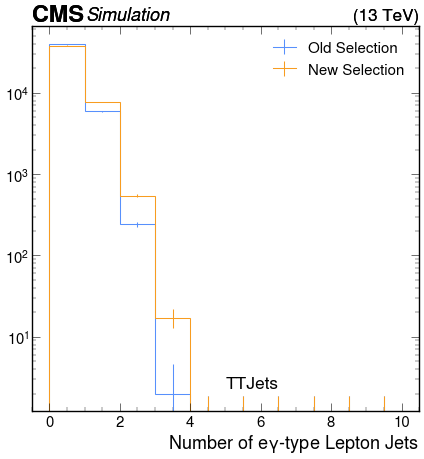

EGM n
6175.0 8270.0 46211.0
13.36261928977949 17.89617190712168


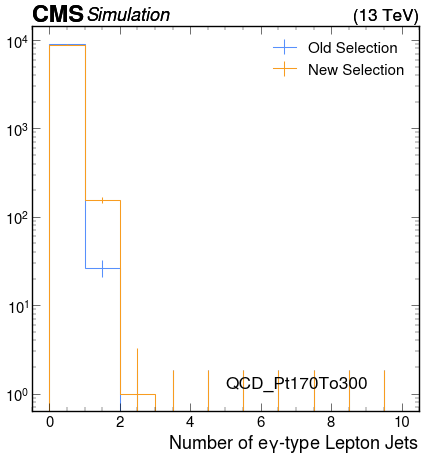

EGM n
26.0 155.0 9027.0
0.2880248144455522 1.7170710091946384


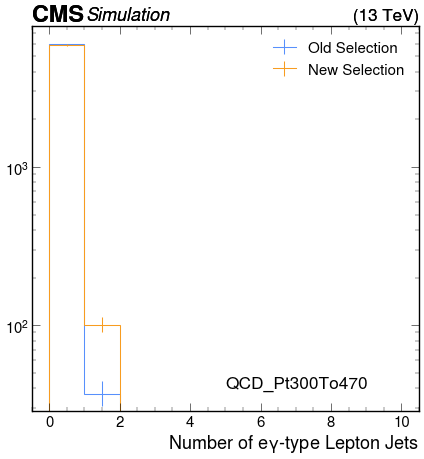

EGM n
37.0 101.0 5976.0
0.6191432396251674 1.6900937081659972


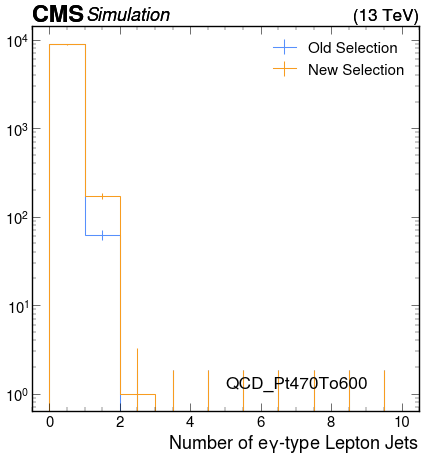

EGM n
62.0 174.0 9012.0
0.6879715934309809 1.9307589880159788


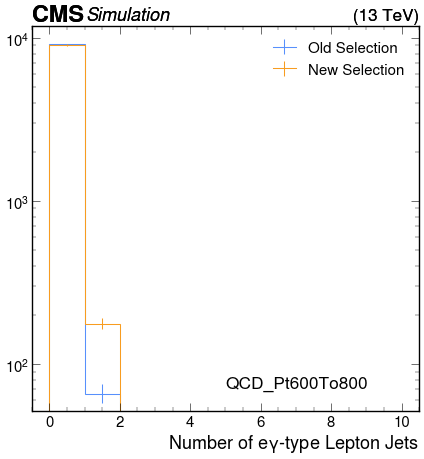

EGM n
66.0 177.0 9191.0
0.718093787400718 1.9257969753019257


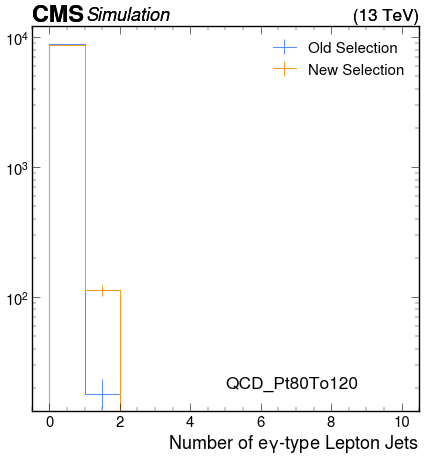

EGM n
18.0 112.0 8860.0
0.20316027088036118 1.2641083521444696


<Figure size 500x500 with 0 Axes>

In [7]:
nplots = 1
legend_entries = [s for s in samples]
for i, sample in enumerate(samples):
    
    utilities.plot(out[sample]['hists']['egm_lj_n'][channels[0], :], label='Old Selection')
    #utilities.plot(out[sample]['hists']['egm_lj_n'][channels[1], :], label='looseID')
    utilities.plot(out[sample]['hists']['egm_lj_n'][channels[2], :], label='New Selection')
    #utilities.plot(out[sample]['hists']['egm_lj_n'][channels[3], :], label='looseID Photon + MVA Electrons')
    plt.legend()
    plt.yscale('log')
    # Get the current axes object
    ax = plt.gca()

    # Add text in the bottom-left corner of the plot
    ax.text(0.5, 0.05, f'{legend_entries[i]}', transform=ax.transAxes, 
            fontsize=25, color='k', ha='left', va='bottom')
    
    plt.savefig(f'{path}/negmJets_{legend_entries[i]}.png', facecolor = 'w', dpi=300)
    plt.show()
    plt.clf()
    
    ## calculating increased backgrounds
    oldSum = out[sample]['hists']['egm_lj_n'][channels[0], 1:].values().sum()
    newSum = out[sample]['hists']['egm_lj_n'][channels[2], 1:].values().sum()
    total = out[sample]['hists']['egm_lj_n'][channels[0], :].values().sum()
    print('EGM n')
    print(oldSum, newSum, total)
    print(oldSum*100/total, newSum*100/total)



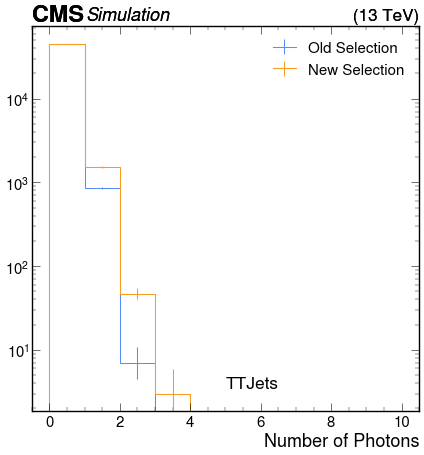

862.0 1589.0 46211.0
1.8653567332453311 3.4385752310056046


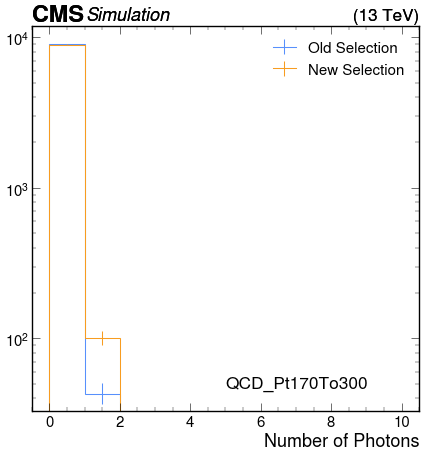

43.0 101.0 9027.0
0.4763487315830287 1.1188656253461837


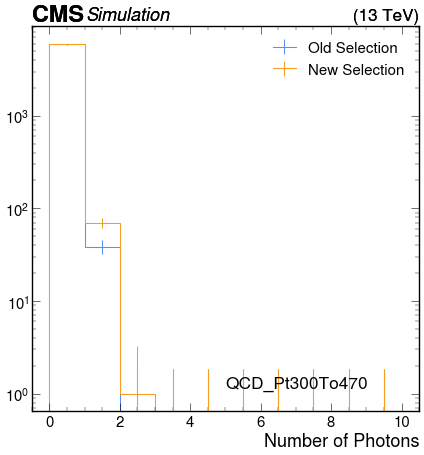

38.0 70.0 5976.0
0.6358768406961178 1.1713520749665327


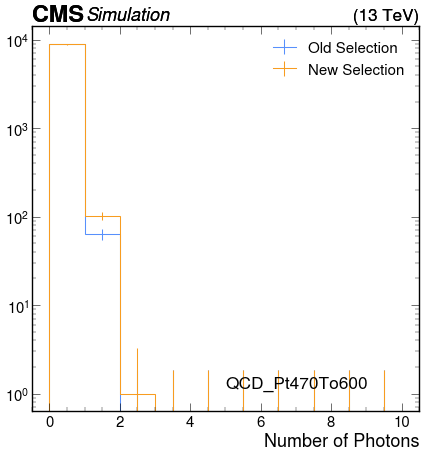

63.0 103.0 9012.0
0.6990679094540613 1.1429205503772748


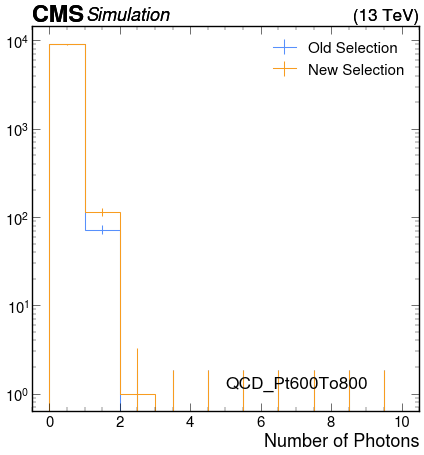

72.0 115.0 9191.0
0.7833750408007834 1.2512240235012513


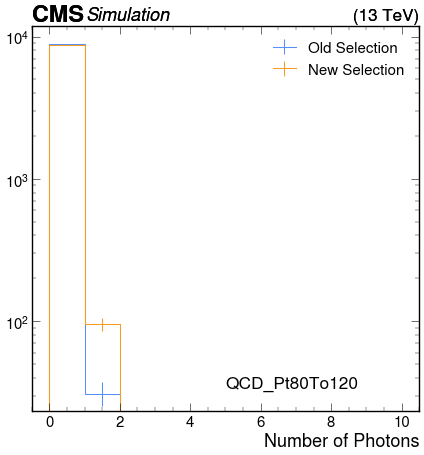

31.0 95.0 8860.0
0.34988713318284426 1.072234762979684


<Figure size 500x500 with 0 Axes>

In [5]:
nplots = 1
legend_entries = [s for s in samples]
for i, sample in enumerate(samples):
    utilities.plot(out[sample]['hists']['photon_n'][channels[0], :], label='Old Selection')
    #utilities.plot(out[sample]['hists']['photon_n'][channels[1], :], label='looseID')
    utilities.plot(out[sample]['hists']['photon_n'][channels[2], :], label='New Selection')
    #utilities.plot(out[sample]['hists']['photon_n'][channels[3], :], label='looseID Photon + MVA Electrons')
    plt.legend()
    plt.yscale('log')
    # Get the current axes object
    ax = plt.gca()

    # Add text in the bottom-left corner of the plot
    ax.text(0.5, 0.05, f'{legend_entries[i]}', transform=ax.transAxes, 
            fontsize=25, color='k', ha='left', va='bottom')
    
    plt.savefig(f'{path}/nPho_remPho_{legend_entries[i]}.png', facecolor = 'w', dpi=300)
    plt.show()
    plt.clf()

    ## calculating increased backgrounds
    oldSum = out[sample]['hists']['photon_n'][channels[0], 1:].values().sum()
    newSum = out[sample]['hists']['photon_n'][channels[2], 1:].values().sum()
    total = out[sample]['hists']['photon_n'][channels[0], :].values().sum()
    print(oldSum, newSum, total)
    print(oldSum*100/total, newSum*100/total)

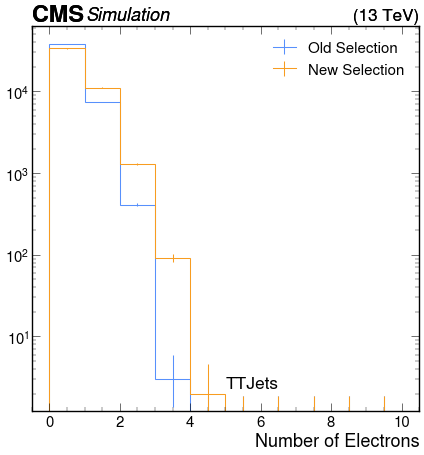

7828.0 12484.0 46211.0
16.939689684274306 27.015212828114517


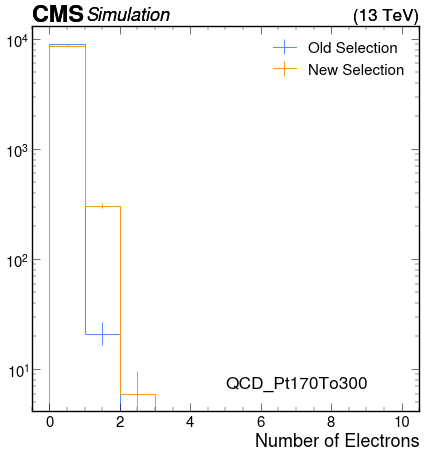

21.0 313.0 9027.0
0.2326354270521768 3.4673756508253017


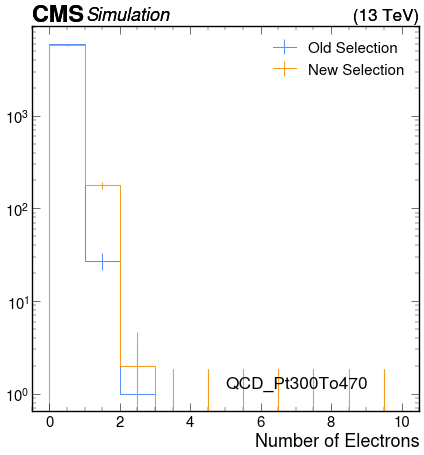

28.0 179.0 5976.0
0.4685408299866131 2.995314591700134


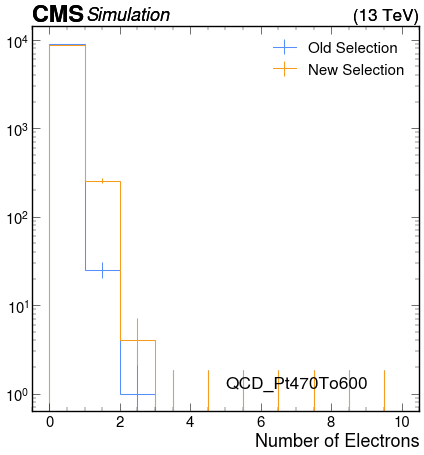

26.0 260.0 9012.0
0.2885042166000888 2.8850421660008876


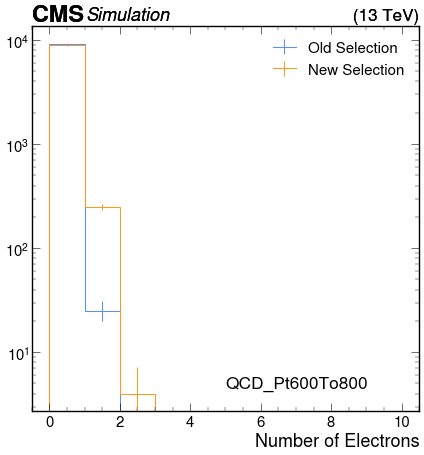

25.0 254.0 9191.0
0.272005222500272 2.7635730606027638


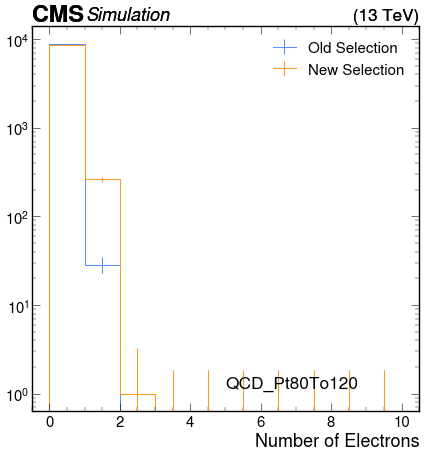

28.0 264.0 8860.0
0.3160270880361174 2.979683972911964


<Figure size 500x500 with 0 Axes>

In [6]:
nplots = 1
legend_entries = [s for s in samples]
for i, sample in enumerate(samples):
    utilities.plot(out[sample]['hists']['electron_n'][channels[0], :], label='Old Selection')
    #utilities.plot(out[sample]['hists']['electron_n'][channels[1], :], label='looseID')
    utilities.plot(out[sample]['hists']['electron_n'][channels[2], :], label='New Selection')
    #utilities.plot(out[sample]['hists']['electron_n'][channels[3], :], label='LooseID Photon + MVA Electrons')
    plt.legend()
    plt.yscale('log')
    ax = plt.gca()

    # Add text in the bottom-left corner of the plot
    ax.text(0.5, 0.05, f'{legend_entries[i]}', transform=ax.transAxes, 
            fontsize=25, color='k', ha='left', va='bottom')
    
    plt.savefig(f'{path}/nElec_remPho_{legend_entries[i]}.png', facecolor = 'w', dpi=300)
    plt.show()
    plt.clf()

    ## calculating increased backgrounds
    oldSum = out[sample]['hists']['electron_n'][channels[0], 1:].values().sum()
    newSum = out[sample]['hists']['electron_n'][channels[2], 1:].values().sum()
    total = out[sample]['hists']['electron_n'][channels[0], :].values().sum()
    print(oldSum, newSum, total)
    print(oldSum*100/total, newSum*100/total)